<a href="https://colab.research.google.com/github/Raniah-ran/machine_learning/blob/main/Iris_Unsupervised_Machine_Learning_Raniah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Input & Check the Data**

Iris dataset is downloaded from : https://www.kaggle.com/datasets/uciml/iris

In [ ]:
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
len(df)

150

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Divide the dataset into X and y
X = df[['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']]
y = df['species']

In [ ]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
X.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Exploratory Data Analysis (EDA)**

In [ ]:
X.isnull().sum()
# To see the missing values

,0
sepallengthcm,0
sepalwidthcm,0
petallengthcm,0
petalwidthcm,0


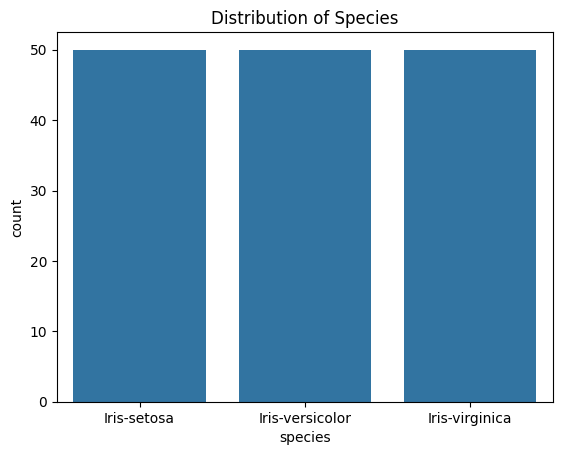

In [ ]:
# Species distribution
sns.countplot(x='species', data=df)
plt.title('Distribution of Species')
plt.show()

In [ ]:
# Species distribution
print(df['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
X.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


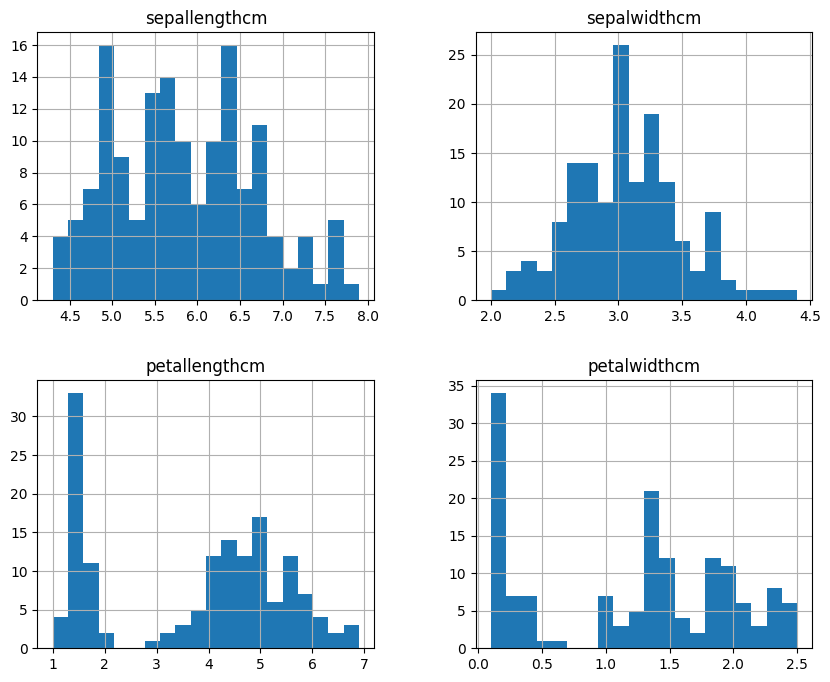

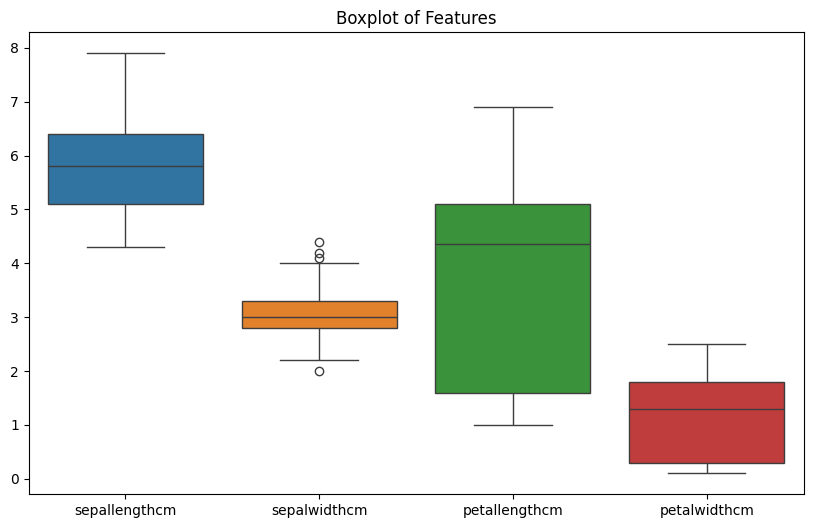

In [ ]:
X.hist(figsize=(10, 8), bins=20)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.show()

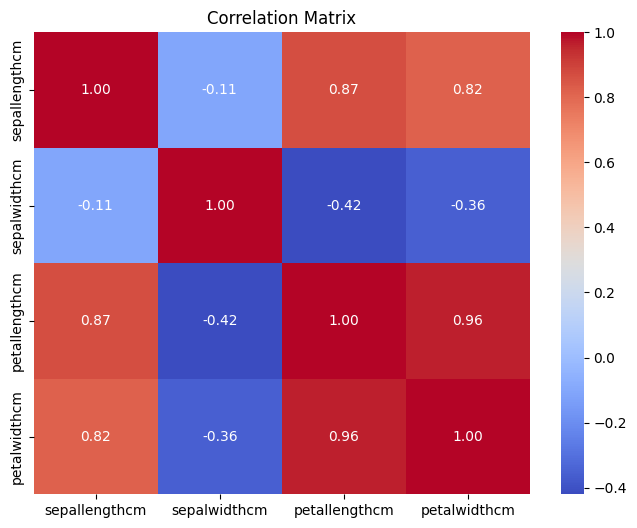

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In a heatmap,


*   a number close to 1 or -1 → have strong relation
*   0 → don't have a correlation



A correlation that have number close to 1 or -1 :
*   petallengthcm & petalwidthcm (0.96)
*   sepallengthcm & petallengthcm (0.87)
*   sepallengthcm & petalwidthcm (0.82)

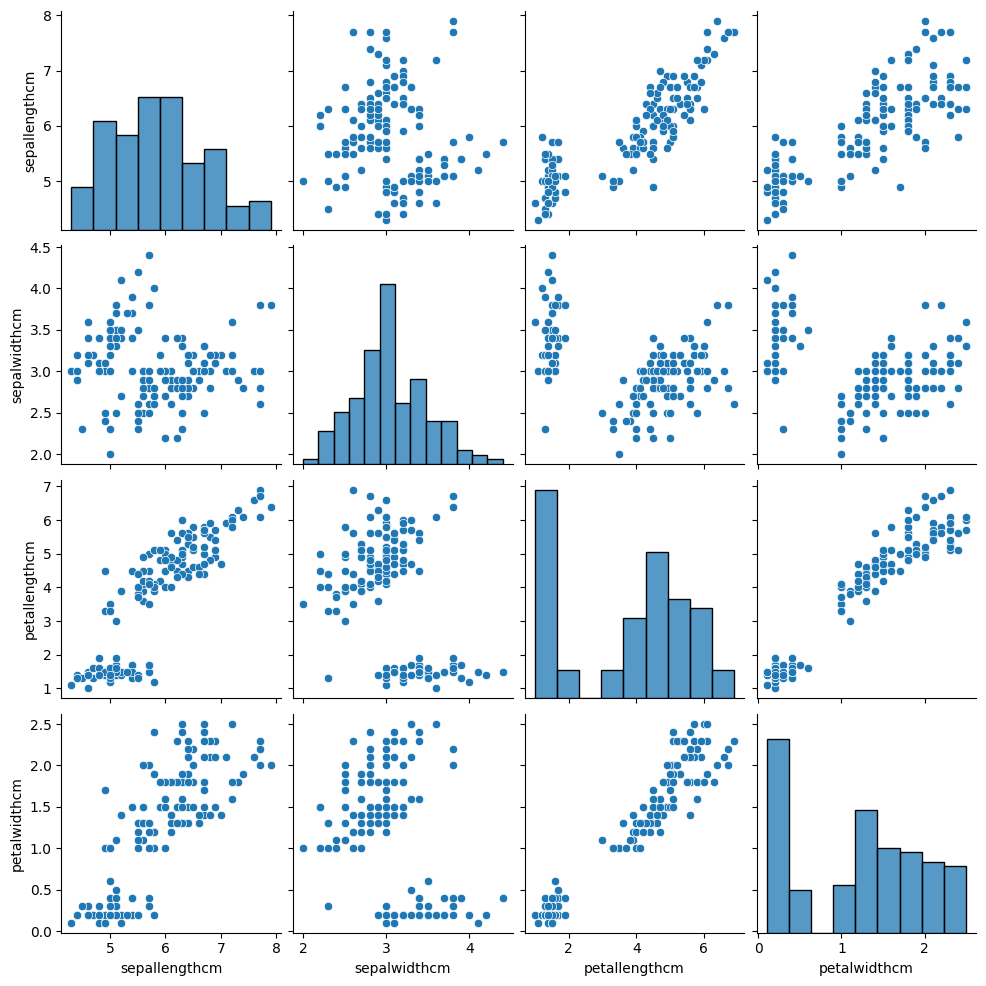

In [ ]:
sns.pairplot(X)
plt.show()

# **K-Means Clustering → ARI = 0.72**

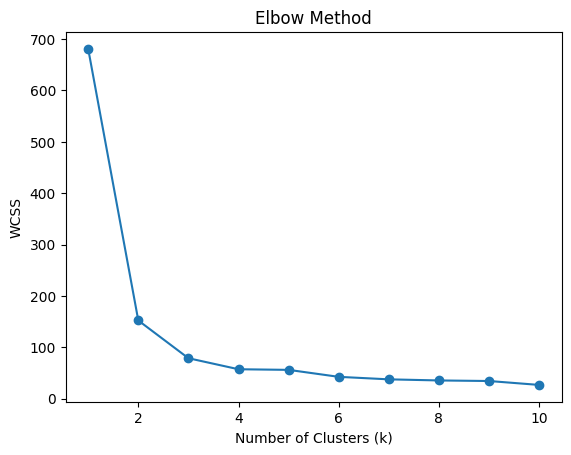

In [ ]:
# Search the optimal k with elbow method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters seems to be k = 3 because, in the elbow method, k = 3 marks the point where the decrease in WCSS starts to slow down.

beside that, k = 3 is used because we wanna make 3 clusters from this data (there're 3 species of iris)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

cluster_labels = kmeans.labels_
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
# Add cluster results to original DataFrame `df`
df['cluster'] = cluster_labels
# Add cluster results into DataFrame
X['cluster'] = cluster_labels

<ipython-input-20-27d29cfc9412>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cluster_labels


In [ ]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [ ]:
X.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
print(X['cluster'].value_counts())

cluster
0    61
1    50
2    39
Name: count, dtype: int64


In [ ]:
ct = pd.crosstab(df['species'], df['cluster'])
print(ct)

cluster           0   1   2
species                    
Iris-setosa       0  50   0
Iris-versicolor  47   0   3
Iris-virginica   14   0  36


This code tell us that:


*   All 50 Iris-setosa flowers were assigned to Cluster 0
*   47 Iris-versicolor flowers were in Cluster 1, and 3 were in Cluster 2
*   36 Iris-virginica flowers were in Cluster 2, and 14 were in Cluster 1



In [ ]:
mapping = {}
for cluster in range(3):  # Assuming 3 clusters
  # Get the species name with the highest count for the current cluster
  species_name = ct[ct.columns[cluster]].idxmax()
  mapping[cluster] = species_name
print("Cluster-to-Species Mapping:", mapping)

Cluster-to-Species Mapping: {0: 'Iris-versicolor', 1: 'Iris-setosa', 2: 'Iris-virginica'}


So from this k-means clustering, we can say that =
*   cluster 0 = iris-versicolor
*   cluster 1 = iris-setosa
*   cluster 2 = iris-virginica

In [ ]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.68


In [ ]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, df['cluster'])
print(f'Adjusted Rand Index: {ari:.2f}')

Adjusted Rand Index: 0.72


## **Visualization**

In [ ]:
# Define a color map for clusters
colors = ['tab:orange', 'tab:blue', 'tab:green']

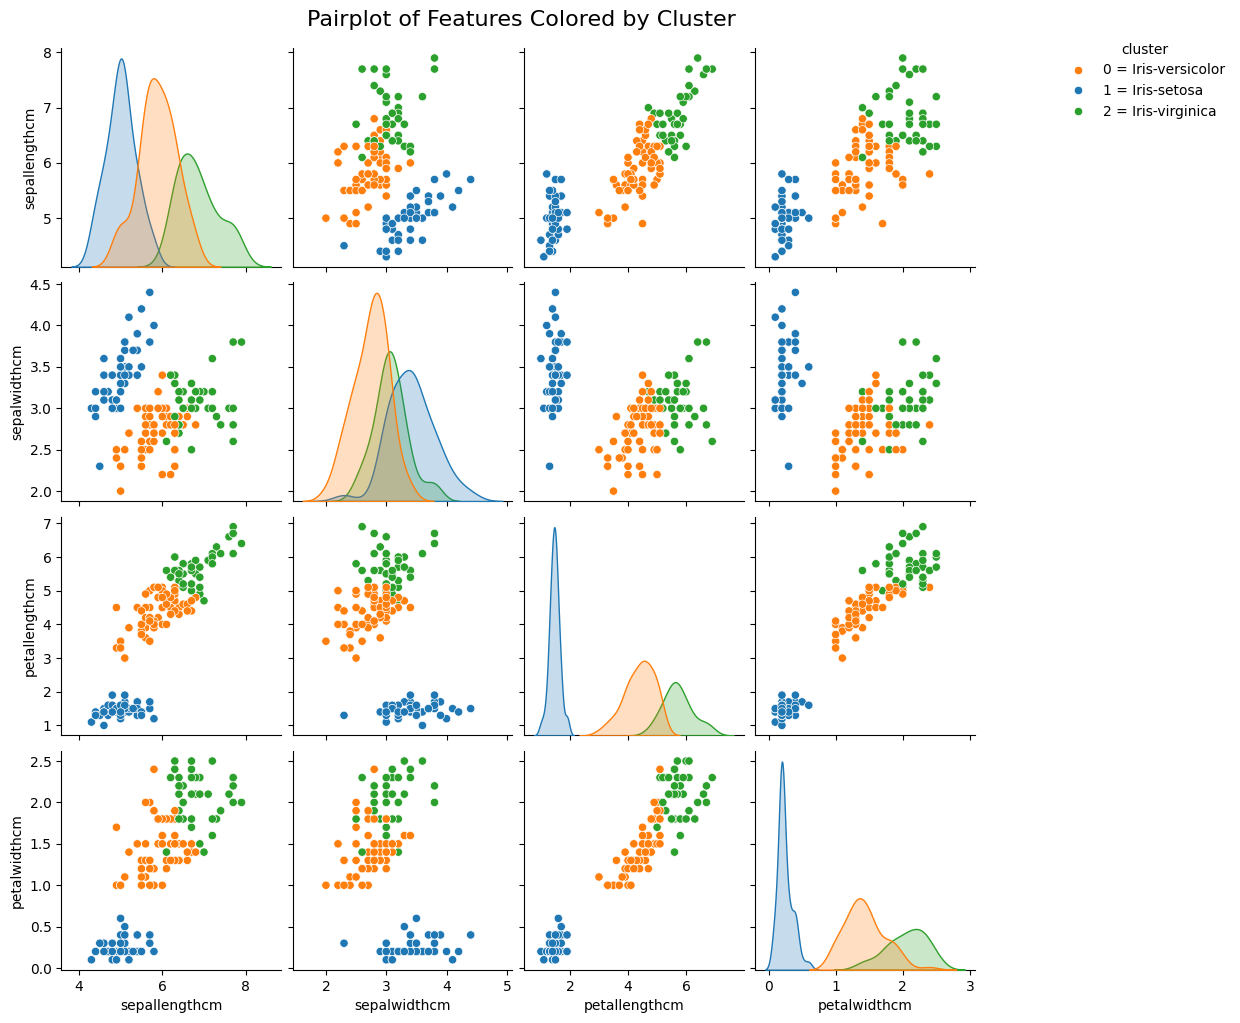

In [ ]:
g = sns.pairplot(df.drop('id', axis=1), hue='cluster', palette=colors)

# Edit legend
legend_labels = ['0 = Iris-versicolor', '1 = Iris-setosa', '2 = Iris-virginica']
for t, label in zip(g._legend.texts, legend_labels):
    t.set_text(label)

# Move the legend outside the plot
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Pairplot of Features Colored by Cluster', fontsize=16, y=1.02)
plt.show()

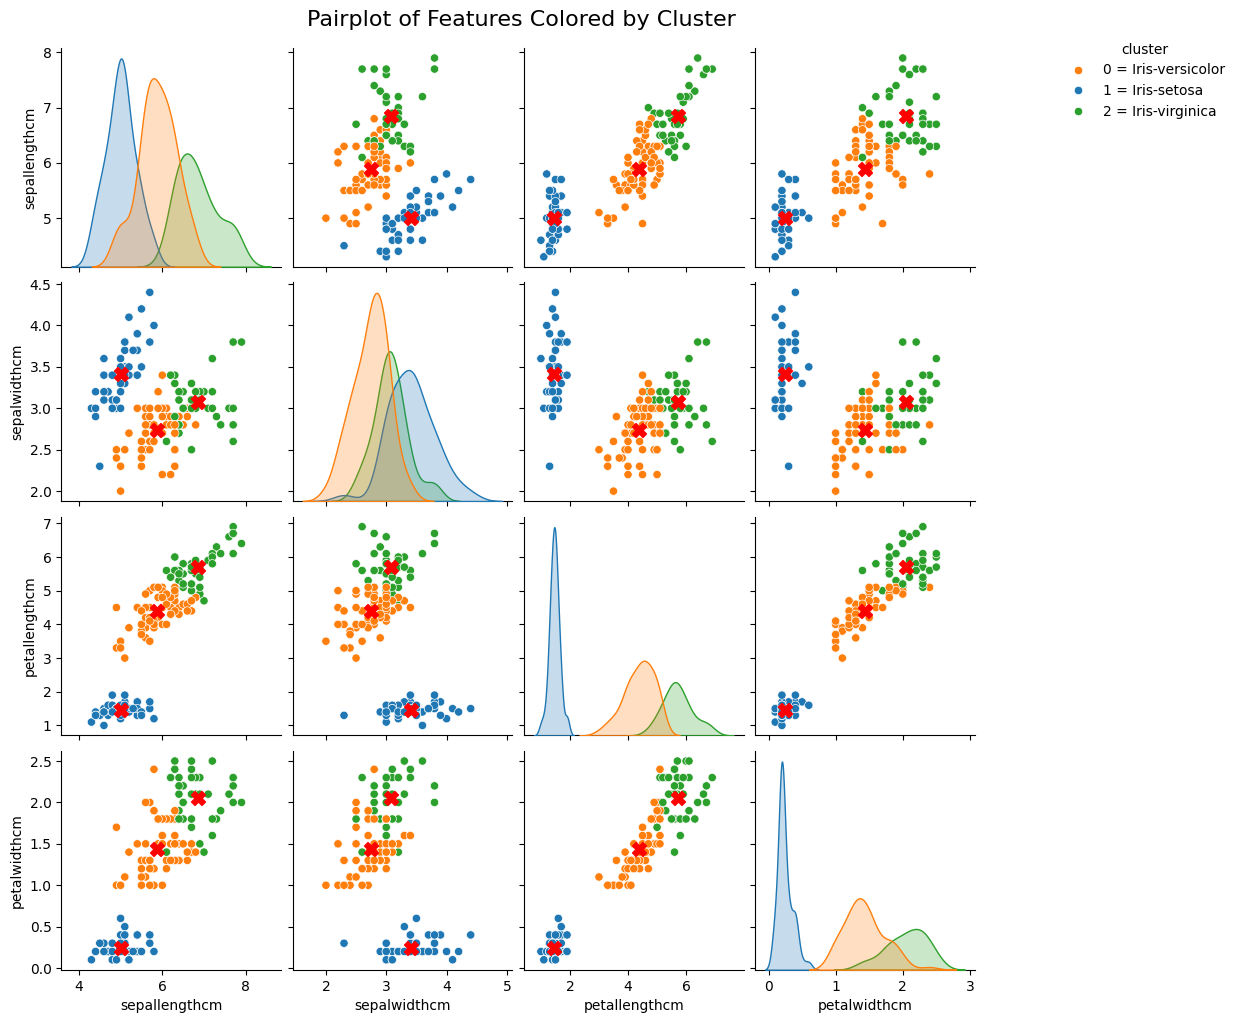

In [ ]:
g = sns.pairplot(df.drop('id', axis=1), hue='cluster', palette=colors)

# Edit legend
legend_labels = ['0 = Iris-versicolor', '1 = Iris-setosa', '2 = Iris-virginica']
for t, label in zip(g._legend.texts, legend_labels):
    t.set_text(label)

# Move the legend outside the plot
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))

# Get cluster centers (centroids)
centers = kmeans.cluster_centers_  # Assuming 'kmeans' is your KMeans object

# Define a mapping between feature names and column indices in `centers`
feature_to_index = {
    'sepallengthcm': 0,
    'sepalwidthcm': 1,
    'petallengthcm': 2,
    'petalwidthcm': 3
}

# Plot centroids on each subplot
for i in range(centers.shape[0]):  # Iterate through clusters
    for ax in g.axes.flat:  # Iterate through subplots
        x_feature = ax.get_xlabel().replace(' (cm)', '')
        y_feature = ax.get_ylabel().replace(' (cm)', '')

        # Get column indices using the mapping
        x_index = feature_to_index.get(x_feature)
        y_index = feature_to_index.get(y_feature)

        # Check if indices are found before plotting
        if x_index is not None and y_index is not None:
            ax.scatter(centers[i, x_index], centers[i, y_index],
                       marker='X', s=100, color='red', label='centroids')

plt.suptitle('Pairplot of Features Colored by Cluster', fontsize=16, y=1.02)
plt.show()

From this plot above, the 'x' red mark is the centroid

Now let's see more clearly at centroids of the k-means in 2D, based on their


*   petallength vs petalwidth
*   sepallength vs sepalwidth



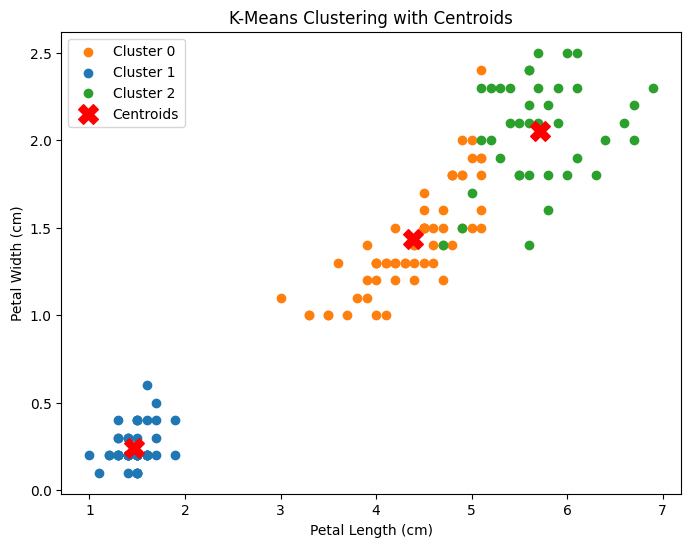

In [ ]:
# Scatter plot of clusters with centroids
plt.figure(figsize=(8, 6))

for cluster in range(3):  # k = 3
    plt.scatter(df[df['cluster'] == cluster]['petallengthcm'],
                df[df['cluster'] == cluster]['petalwidthcm'],
                c=colors[cluster],  # Assign color based on cluster
                label=f'Cluster {cluster}')

# Plot cluster centers
centers = kmeans.cluster_centers_  # Getting cluster centers
plt.scatter(centers[:, 2], centers[:, 3],
            c='red', marker='X', s=200, label='Centroids')

# Plot settings
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()


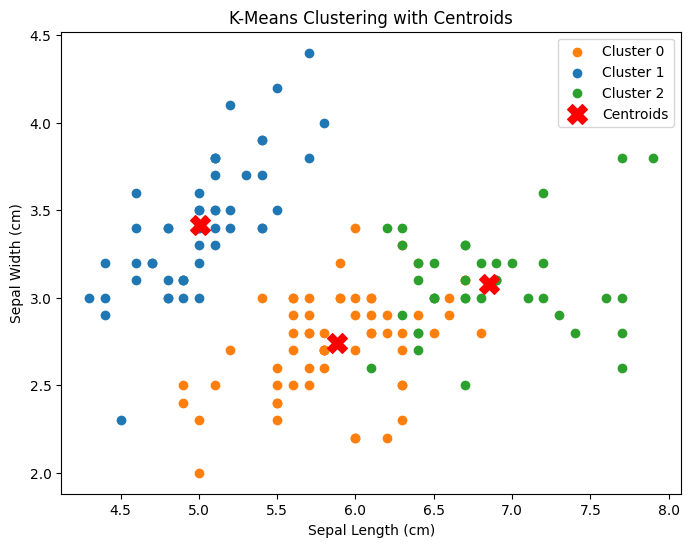

In [ ]:
# Scatter plot of clusters with centroids
plt.figure(figsize=(8, 6))

for cluster in range(3):  # k = 3
    plt.scatter(df[df['cluster'] == cluster]['sepallengthcm'],
                df[df['cluster'] == cluster]['sepalwidthcm'],
                c=colors[cluster],  # Assign color based on cluster
                label=f'Cluster {cluster}')

# Plot cluster centers
centers = kmeans.cluster_centers_  # Getting cluster centers
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='X', s=200, label='Centroids')

# Plot settings
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()

We can create a plot based on species (ground truth) to visually compare it with the K-Means clustering results

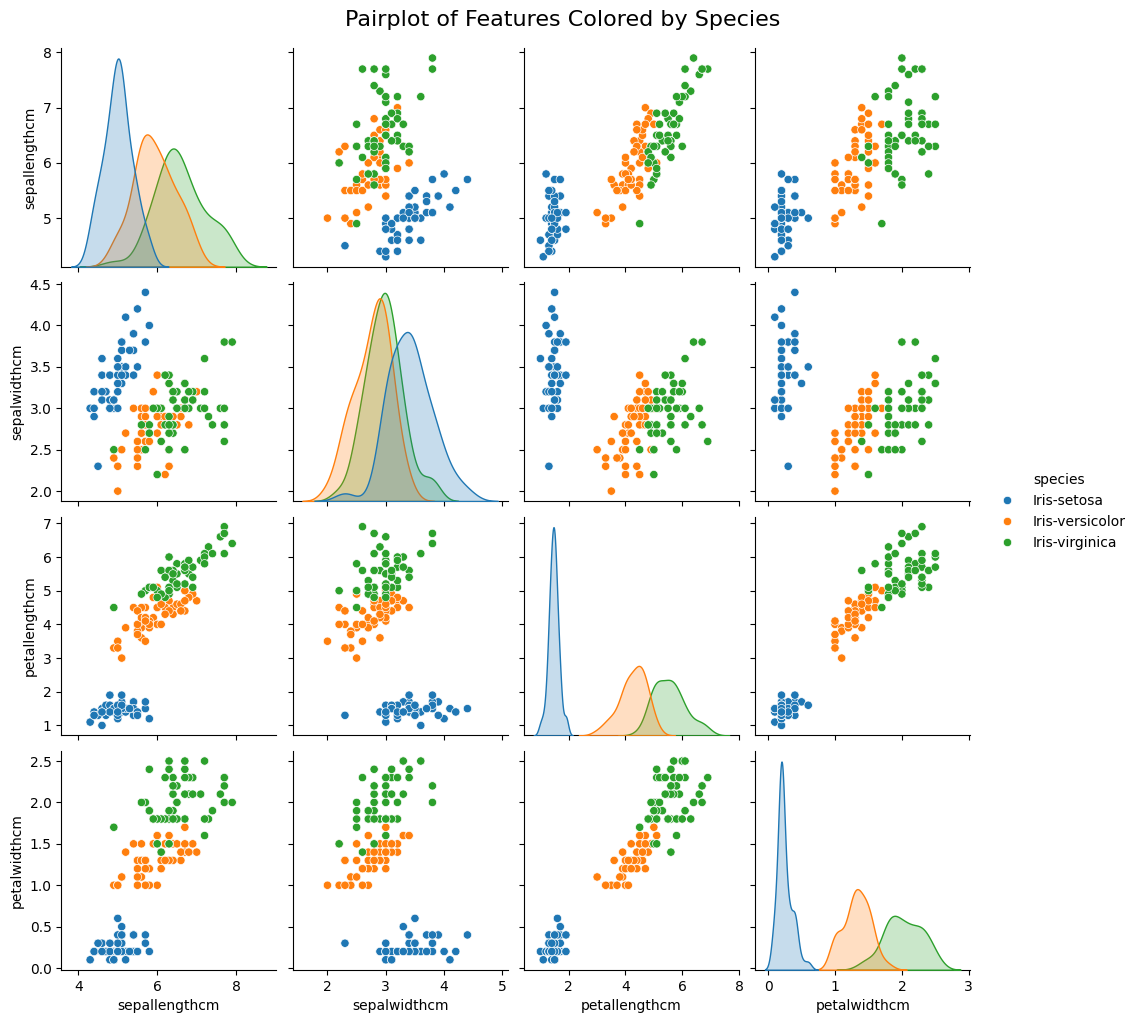

In [ ]:
color_species = [ 'tab:blue', 'tab:orange', 'tab:green']

sns.pairplot(df.drop(['id', 'cluster'], axis=1), hue='species', palette=color_species)
plt.suptitle('Pairplot of Features Colored by Species', fontsize=16, y=1.02)
plt.show()